<a href="https://colab.research.google.com/github/coolphotography/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#load a CSV file as a pandas dataframe
Telecom_churn_df = pd.read_csv('/content/drive/MyDrive/capstone_project/Telecom_Churn.csv')

In [4]:
#Checking the columns
Telecom_churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
#displaying the first five rows.
Telecom_churn_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
#displaying the last five rows.
Telecom_churn_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


**1.** **LOOKING FOR AND HANDLING NaN/Null/Missing DATA**

In [7]:
Telecom_churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**INFERENCE**: 

The given dataset file is a clean file with no NaN.

In [8]:
Telecom_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

**INFERENCE:** 

From .info() we shall notice every column has 3333 non-null homogeneous column entry.



---



---



**2. DATA CLEANING**: Though the dataset does not contain Nan, the column names still needs cleaning up, for example, "Voice mail plan" should be called "Voice\_mail\_plan", i.e., all the columns with white spaces between the words should be replaced with underscores(\_).

In [9]:
# Defining function for replacing the white spaces with underscores.
def get_underscore_for_space_list(list_of_strings):
  for string_ in range(len(list_of_strings)):
    list_of_strings[string_] = '_'.join(list_of_strings[string_].split())
  return list_of_strings

In [10]:
# Calling 'get_underscore_for_space_list'.
Telecom_churn_df.columns = get_underscore_for_space_list(list(Telecom_churn_df.columns))

In [11]:
Telecom_churn_df.columns

Index(['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn'],
      dtype='object')



---



---



**3. ANALYSING THE DATA.**

3.1. The correlation of various parameters is visualized in a heat map.

Text(0.5, 1.0, 'Fig.1: Heat Map for correlation among attributes')

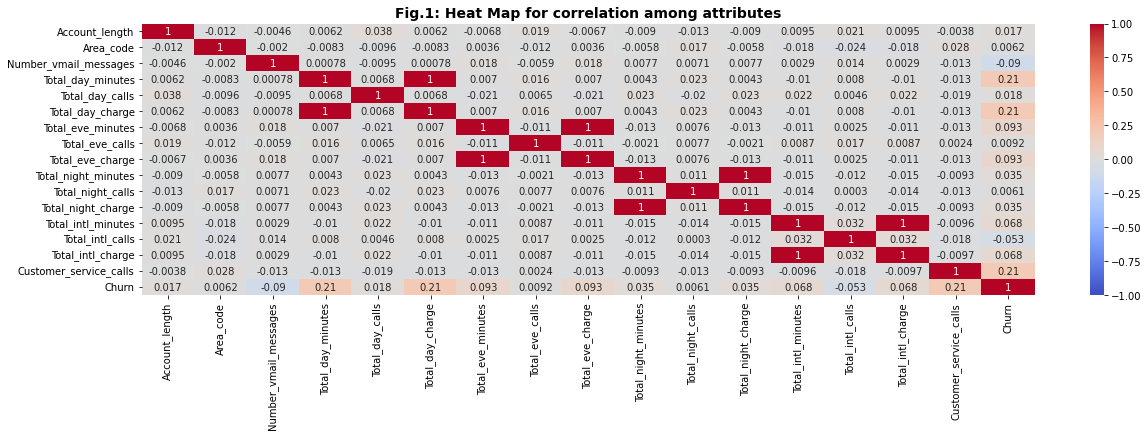

In [12]:
#corr_df consists of correlation value between various numerical columns.
corr_df = Telecom_churn_df[['Account_length', 'Area_code', 'Number_vmail_messages','Total_day_minutes', 'Total_day_calls', 
                            'Total_day_charge', 'Total_eve_minutes', 'Total_eve_calls', 'Total_eve_charge','Total_night_minutes', 
                            'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes', 'Total_intl_calls', 'Total_intl_charge',
                            'Customer_service_calls', 'Churn']].corr()
#plotting the heatmap.
plt.figure(figsize=(20,5))
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.title('Fig.1: Heat Map for correlation among attributes', fontsize = 14, fontweight ='bold')

**REASONING:** 

I believe the best way to identify the key attributes is by correlating the data and plotting a heatmap.

**INFERENCE:** 

There is a strong correlation between Total\_day/night/eve/intl\_minutes and Total\_day/night/eve/intl\_charge and it makes sense because we are charged by the length of our call.

Many columns are uncorrelated, which can be understandable through our intuition, however, the important correlation should be noticed between the column "Churn" and various columns "Total\_day\_minutes", "Total\_day\_charge", "Total\_evening\_minutes", "Total\_evening\_charge", "Total\_intl\_minutes", and "Customer\_service\_calls", since correlation is significant. 

Account\_length, Area\_code, Total\_day/eve/night\_calls are quite insignificant to the Churn.

Further analysis of these columns will be done using various visualization tools.


3.2. Stacked bar graph demonstrating relation between non-numerical attributes and churn ratio.

In [13]:
# overall churn ratio.
Overall_churn_rate = Telecom_churn_df['Churn'].mean()
print(f"Overall churn ratio is {round(Overall_churn_rate, 2)}")

Overall churn ratio is 0.14


In [14]:
# Calculating churn ratio for 'Area Code', 'International Plan', 'Voice mail plan', 'Customer service calls'.
Churn_rate_area_code = Telecom_churn_df.groupby("Area_code")["Churn"].mean().reset_index()
Churn_rate_international_plan = Telecom_churn_df.groupby("International_plan")["Churn"].mean().reset_index()
Churn_rate_voice_plan = Telecom_churn_df.groupby("Voice_mail_plan")["Churn"].mean().reset_index()
Churn_rate_customer_service_call = Telecom_churn_df.groupby("Customer_service_calls")["Churn"].mean().reset_index()

Text(0.5, 0.98, 'Fig.2: Stacked bar graph for various attributes against Churn Ratio')

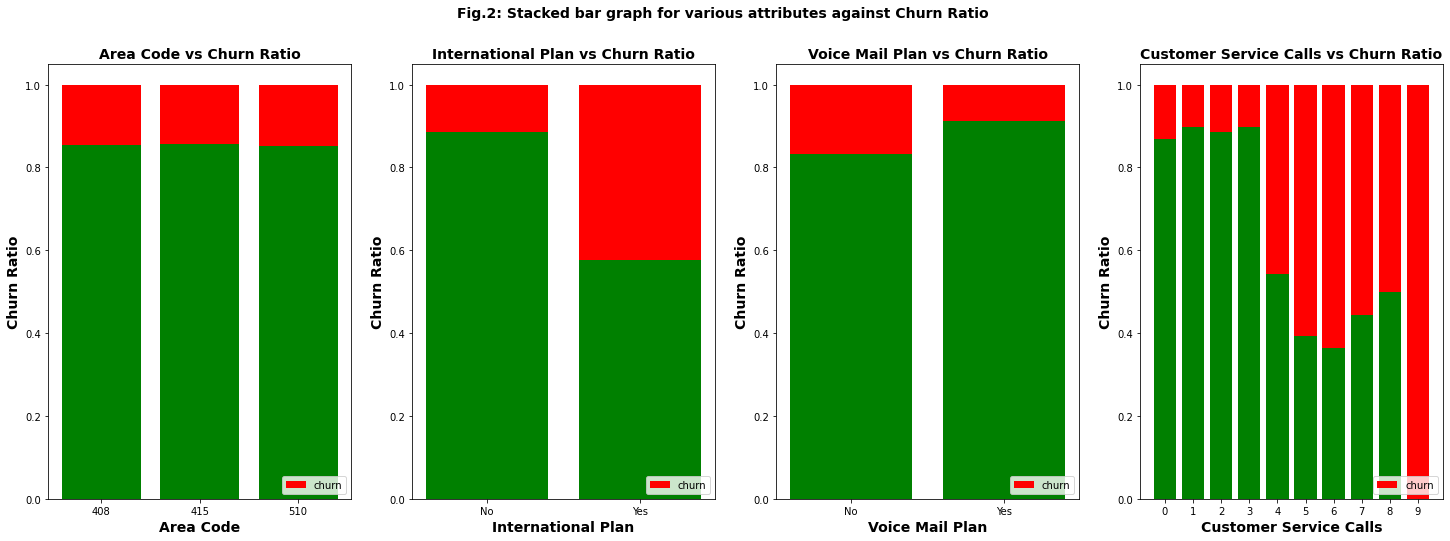

In [15]:
# Using sub-plot to get a consolidated visual.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (25, 8)) # 1- row, 4- columns.

# subplot-1 for the area code vs Churn rate.
ax1.bar(Churn_rate_area_code['Area_code'].apply(lambda x: str(x)), (1-Churn_rate_area_code['Churn']), color = 'g')
ax1.bar(Churn_rate_area_code['Area_code'].apply(lambda x: str(x)), Churn_rate_area_code['Churn'], 
        bottom = (1 - Churn_rate_area_code['Churn']), color = 'r', label = 'churn')
ax1.legend(loc='lower right')
ax1.set_xlabel('Area Code', fontsize = 14, fontweight ='bold')
ax1.set_ylabel('Churn Ratio', fontsize = 14, fontweight ='bold')
ax1.set_title('Area Code vs Churn Ratio', fontsize = 14, fontweight ='bold')

# subplot-2 for the international plan vs Churn rate.
ax2.bar(Churn_rate_international_plan['International_plan'], (1-Churn_rate_international_plan['Churn']), color = 'g')
ax2.bar(Churn_rate_international_plan['International_plan'], Churn_rate_international_plan['Churn'], 
        bottom = (1 - Churn_rate_international_plan['Churn']), color = 'r', label = 'churn')
ax2.legend(loc='lower right')
ax2.set_xlabel('International Plan', fontsize = 14, fontweight ='bold')
ax2.set_ylabel('Churn Ratio', fontsize = 14, fontweight ='bold')
ax2.set_title('International Plan vs Churn Ratio', fontsize = 14, fontweight ='bold')

# subplot-3 for the voice mail plan plan vs Churn rate.
ax3.bar(Churn_rate_voice_plan['Voice_mail_plan'], (1-Churn_rate_voice_plan['Churn']), color = 'g')
ax3.bar(Churn_rate_voice_plan['Voice_mail_plan'], Churn_rate_voice_plan['Churn'], 
        bottom = (1 - Churn_rate_voice_plan['Churn']), color = 'r', label = 'churn')
ax3.legend(loc='lower right')
ax3.set_xlabel('Voice Mail Plan', fontsize = 14, fontweight ='bold')
ax3.set_ylabel('Churn Ratio', fontsize = 14, fontweight ='bold')
ax3.set_title('Voice Mail Plan vs Churn Ratio', fontsize = 14, fontweight ='bold')

# subplot-4 for the customer service calls vs Churn rate.
ax4.bar(Churn_rate_customer_service_call['Customer_service_calls'], (1-Churn_rate_customer_service_call['Churn']), color = 'g')
ax4.bar(Churn_rate_customer_service_call['Customer_service_calls'], Churn_rate_customer_service_call['Churn'], 
        bottom = (1 - Churn_rate_customer_service_call['Churn']), color = 'r', label = 'churn')
ax4.legend(loc='lower right')
ax4.set_xlabel('Customer Service Calls', fontsize = 14, fontweight ='bold')
ax4.set_ylabel('Churn Ratio', fontsize = 14, fontweight ='bold')
ax4.set_title('Customer Service Calls vs Churn Ratio', fontsize = 14, fontweight ='bold')
ax4.set_xticks(Churn_rate_customer_service_call['Customer_service_calls'])

fig.suptitle('Fig.2: Stacked bar graph for various attributes against Churn Ratio',fontsize = 14, fontweight ="bold")

**OBSERVATIONS:**
1.   It appears that the churn ratio for each area code does not vary from the overall churn ratio.
2. With an international plan, the churn ratio is 3 times larger.
3.   Customers without voice mail plans seem to experience higher churn than average.
4. For customer service calls exceeding four, the churn rate is significantly higher.

**INFERENCE:**

1. Fig. 1(heatmap) already shows that area code has no impact on churn. Fig.2(stacked bar graph) further demonstrates that area code is not affected by churn. 
2. Many customers with international plans churn either because international calls are more expensive than other operators or because the service is bad.
3. It may be that voice mail has more churn for a different reason, but further exploration will yield a better understanding.
4. Those accounts with more than 4 customer service calls may have a problem with their services and chose to churn.






3.3. Scatter plot for state and the churn rate.

In [16]:
# Churn ratio for every state.
State_churn_df = Telecom_churn_df.groupby('State')['Churn'].mean().reset_index()

Text(0, 0.5, 'Churn Ratio')

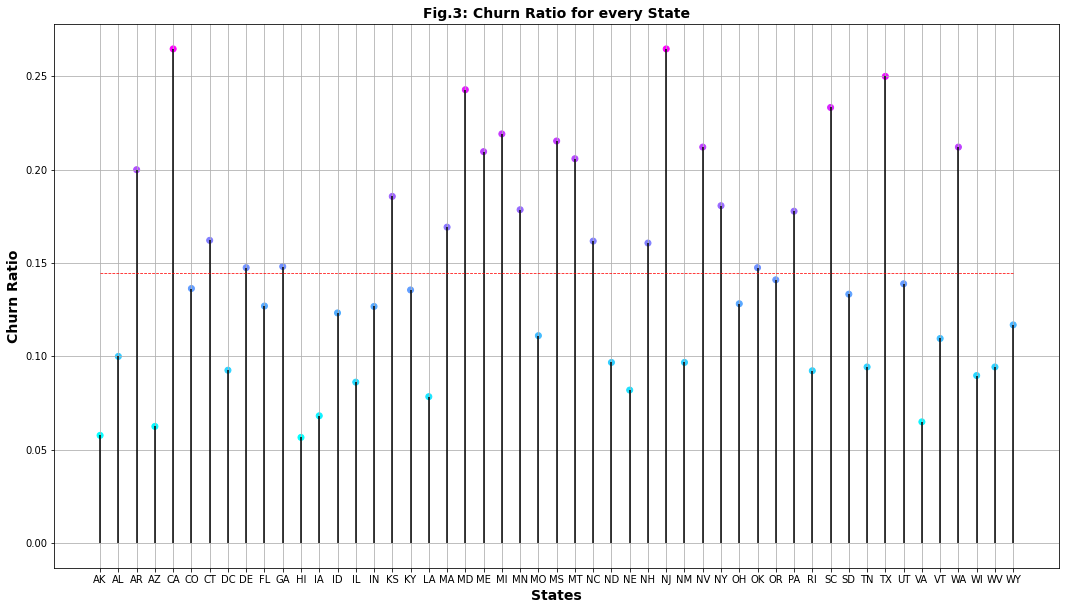

In [17]:
plt.figure(figsize=(18,10))
plt.grid()
plt.vlines(State_churn_df['State'], ymin = 0.0, ymax = State_churn_df['Churn'])
plt.scatter(State_churn_df['State'], State_churn_df['Churn'], c = State_churn_df['Churn'], cmap = 'cool')
plt.plot(State_churn_df['State'], [Overall_churn_rate] * len(State_churn_df['State']),
         "--", color = 'r', linewidth=.75)
plt.title("Fig.3: Churn Ratio for every State", fontsize = 14, fontweight ="bold")
plt.xlabel('States', fontsize = 14, fontweight ='bold')
plt.ylabel('Churn Ratio', fontsize = 14, fontweight ='bold')

In [18]:
print(f"States whose churn ratio is higher than the average- \n{list(State_churn_df[State_churn_df['Churn'] > Overall_churn_rate]['State'])}")

States whose churn ratio is higher than the average- 
['AR', 'CA', 'CT', 'DE', 'GA', 'KS', 'MA', 'MD', 'ME', 'MI', 'MN', 'MS', 'MT', 'NC', 'NH', 'NJ', 'NV', 'NY', 'OK', 'PA', 'SC', 'TX', 'WA']


**OBSERVATIONS:**

The red dotted line represents the average churn ratio. Of the 51 states, 23 have churn rates that are higher than average.

**INFERENCE:**

A variety of lucrative incentives and proper services need to be offered to the 23 states for customer retention.



---



---



4.  RELATION WITH CHARGES AND CHURNS.

Fig.1 demonstrates the higher correlation of churn rate with charges. Here, we shall have a deeper understanding between these attributes.

In [19]:
# Calculating Total Charge for every account.
# Total Charge = Total day charge + Total eve charge + Total night charge + Total international charge.
Total_charge_cal_df = Telecom_churn_df.copy()
Total_charge_cal_df['Total_charge'] = Telecom_churn_df['Total_day_charge'] + Telecom_churn_df['Total_eve_charge']\
+ Telecom_churn_df['Total_night_charge'] + Telecom_churn_df['Total_intl_charge']
# sorting the rows in 'Total_charge_cal_df' according to the Total charge.
Total_charge_cal_df = Total_charge_cal_df.sort_values(by = 'Total_charge').reset_index(drop = True)

In [20]:
# Function to return a list of consecutive 101 elements sum of a column in a dataframe.
row_list = np.linspace(start = 0, stop = 3333, num = 34, dtype = int) # a sequence with interval of 101.
def get_sum_for_101_rows(col_name):
  cumulative_values = []
  for i in range(1, len(row_list)):
    cumulative_values.append(Total_charge_cal_df.iloc[row_list[i-1]:row_list[i]][col_name].sum())
  return cumulative_values

In [21]:
cumulative_charges_df = pd.DataFrame() #creating an empty dataframe.
cumulative_charges_df['Churn'] = get_sum_for_101_rows('Churn')
cumulative_charges_df['Total_day_charge'] = get_sum_for_101_rows('Total_day_charge')
cumulative_charges_df['Total_eve_charge'] = get_sum_for_101_rows('Total_eve_charge')
cumulative_charges_df['Total_night_charge'] = get_sum_for_101_rows('Total_night_charge')
cumulative_charges_df['Total_intl_charge'] = get_sum_for_101_rows('Total_intl_charge')

In [22]:
# x-axis for the plot.
total_charge = []
for i in range(1, len(row_list)):
  total_charge.append(str(round(Total_charge_cal_df['Total_charge'].iloc[row_list[i-1]],1)) + '-'\
                      + str(round(Total_charge_cal_df['Total_charge'].iloc[row_list[i]-1],1)))

Text(0.5, 0.98, 'Fig.4: A detailed plot for various charges vs churn')

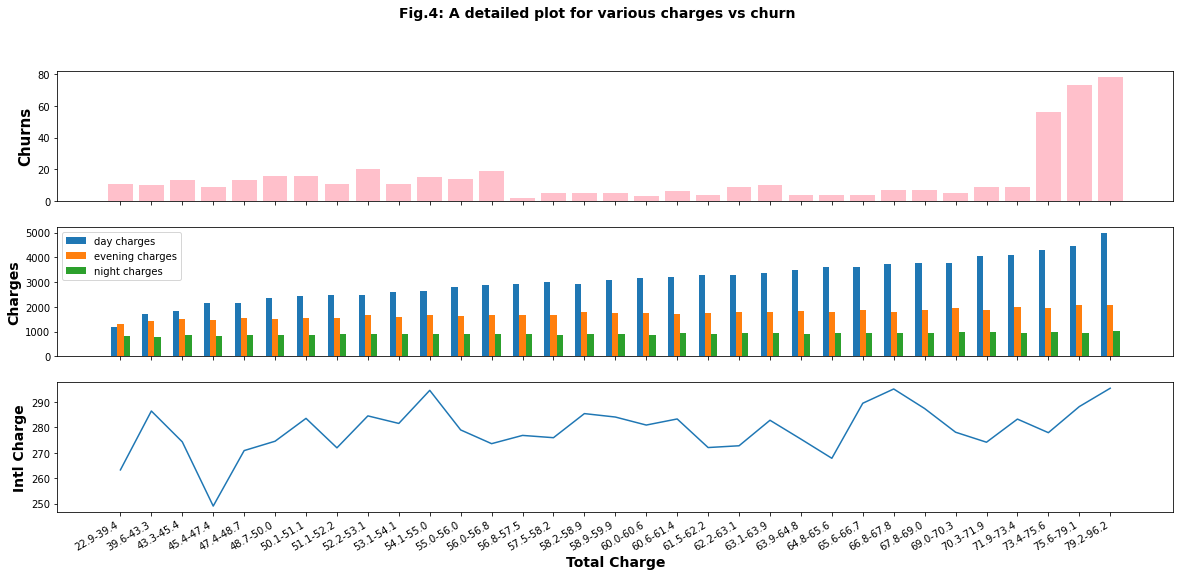

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col', figsize = (20, 9)) #3-rows, 1 col

# subplot - 1
ax1.bar(total_charge,cumulative_charges_df['Churn'],color ='pink')
ax1.set_ylabel('Churns', fontweight ='bold', fontsize = 15)

# subplot - 2
width = 0.2
x_day_charge = [x - width for x in range(len(cumulative_charges_df['Total_day_charge']))]
x_eve_charge = [x for x in range(len(cumulative_charges_df['Total_eve_charge']))]
x_night_charge = [x + width for x in range(len(cumulative_charges_df['Total_night_charge']))]
ax2.bar(x_day_charge, cumulative_charges_df['Total_day_charge'], width, label = "day charges")
ax2.bar(x_eve_charge, cumulative_charges_df['Total_eve_charge'], width, label = "evening charges")
ax2.bar(x_night_charge, cumulative_charges_df['Total_night_charge'], width, label = "night charges")
ax2.set_ylabel('Charges', fontweight ='bold', fontsize = 14)
ax2.legend()

# subplot - 3
ax3.plot(total_charge, cumulative_charges_df['Total_intl_charge'])
ax3.set_xlabel('Total Charge', fontweight ='bold', fontsize = 14)
ax3.set_ylabel('Intl Charge', fontweight ='bold', fontsize = 14)
plt.gcf().autofmt_xdate()

fig.suptitle('Fig.4: A detailed plot for various charges vs churn',fontsize = 14, fontweight ="bold")

**OBSEVATION:**

There is a high churn when the total charge exceeds 73 dollars, and it appears that the day charge is responsible for most of the increase.

**INFERENCE:**

Fig.1 already illustrates that the effect of total daily charges (or total daily minutes) on Churn is higher than any other charges. This can be verified in Fig.4. Having more total day minutes will increase the network's traffic, which may result in call drops, leading to bad service, and hence churn. Another possibility is that the prices of other networks are lower for more call duration.




---



---



5. INTERNATIONAL PLAN AND VOICE MAIL PLAN FOR CHURNED AND ACTIVE ACCOUNTS.

In [24]:
# number of accounts which cancelled the subscription.
Churned_accounts = Telecom_churn_df["Churn"].value_counts()[True]
# number of accounts which are still retained.
Active_accounts = Telecom_churn_df["Churn"].value_counts()[False]

In [25]:
# VP - Voice mail plan & IP - International plan.
# Churned accounts with VP, IP, both and neither.
Churned_accounts_w_VP_IP = Telecom_churn_df[(Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'Yes') \
                 & (Telecom_churn_df['International_plan'] == 'Yes')]["Churn"].sum()
Churned_accounts_w_IP_only_nonVP = Telecom_churn_df[(Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'No') \
                 & (Telecom_churn_df['International_plan'] == 'Yes')]["Churn"].sum()
Churned_accounts_w_VP_only_nonIP = Telecom_churn_df[(Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'Yes') \
                 & (Telecom_churn_df['International_plan'] == 'No')]["Churn"].sum()
Churned_accounts_w_neither_VP_IP = Telecom_churn_df[(Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'No') \
                 & (Telecom_churn_df['International_plan'] == 'No')]["Churn"].sum()                

In [26]:
# Active accounts with VP, IP, both and neither.
Active_accounts_w_VP_IP = (~Telecom_churn_df[(~Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'Yes') \
                 & (Telecom_churn_df['International_plan'] == 'Yes')]["Churn"]).sum()
Active_accounts_w_IP_only_nonVP = (~Telecom_churn_df[(~Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'No') \
                 & (Telecom_churn_df['International_plan'] == 'Yes')]["Churn"]).sum()
Active_accounts_w_VP_only_nonIP = (~Telecom_churn_df[(~Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'Yes') \
                 & (Telecom_churn_df['International_plan'] == 'No')]["Churn"]).sum()
Active_accounts_w_neither_VP_IP = (~Telecom_churn_df[(~Telecom_churn_df['Churn']) & (Telecom_churn_df['Voice_mail_plan'] == 'No') \
                 & (Telecom_churn_df['International_plan'] == 'No')]["Churn"]).sum()

Text(0.5, 0.98, 'Fig.5: Pie chart for IP and VP for Churned and Active accounts')

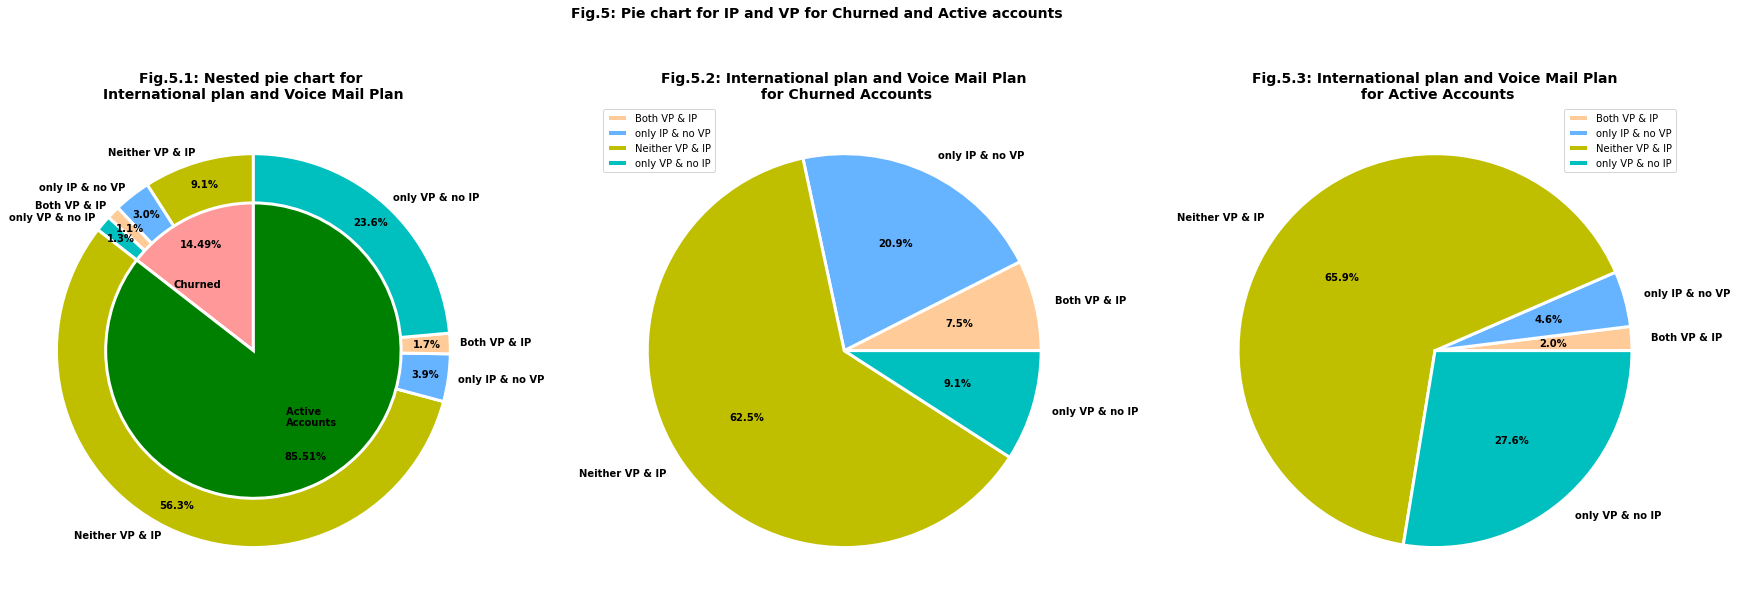

In [27]:
# subplot for pie chart
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10)) # 1 - row and 3 - columns.

ax1.pie([Churned_accounts_w_neither_VP_IP, Churned_accounts_w_IP_only_nonVP, Churned_accounts_w_VP_IP, 
         Churned_accounts_w_VP_only_nonIP, Active_accounts_w_neither_VP_IP,
        Active_accounts_w_IP_only_nonVP, Active_accounts_w_VP_IP, Active_accounts_w_VP_only_nonIP],
        labels = ['Neither VP & IP', 'only IP & no VP', 'Both VP & IP', 'only VP & no IP', 'Neither VP & IP', 
                  'only IP & no VP', 'Both VP & IP', 'only VP & no IP'], pctdistance = 0.88, autopct = '%2.1f%%', 
        radius = 1.0, labeldistance = 1.05, textprops = {'fontweight': 'bold', 'fontsize' : 10},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, startangle = 90, 
        colors = ['y', '#66b3ff', '#ffcc99', 'c', 'y', '#66b3ff', '#ffcc99', 'c',]) # for outer pie chart.
ax1.pie([Churned_accounts, Active_accounts], labels = ["Churned", "Active \nAccounts"],
        radius = 0.75, colors = ['#ff9999', 'g'], autopct = '%2.2f%%', labeldistance = 0.5,
        textprops = {'fontweight': 'bold', 'fontsize' : 10},
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, startangle = 90, pctdistance = 0.8) # for inner pie chart.
ax1.set_title("Fig.5.1: Nested pie chart for \nInternational plan and Voice Mail Plan", fontweight ='bold', fontsize = 14)

ax2.pie([Churned_accounts_w_VP_IP, Churned_accounts_w_IP_only_nonVP, Churned_accounts_w_neither_VP_IP, 
         Churned_accounts_w_VP_only_nonIP], labels = ['Both VP & IP', 'only IP & no VP', 'Neither VP & IP', 'only VP & no IP'],
        autopct = '%2.1f%%', wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, textprops = {'fontweight': 'bold'},
        colors = ['#ffcc99', '#66b3ff', 'y', 'c'])
ax2.legend()
ax2.set_title("Fig.5.2: International plan and Voice Mail Plan\n for Churned Accounts", fontweight ='bold', fontsize = 14)

ax3.pie([Active_accounts_w_VP_IP, Active_accounts_w_IP_only_nonVP, Active_accounts_w_neither_VP_IP, 
         Active_accounts_w_VP_only_nonIP], labels = ['Both VP & IP', 'only IP & no VP', 'Neither VP & IP', 'only VP & no IP'],
        autopct = '%2.1f%%', wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'}, textprops = {'fontweight': 'bold'},
        colors = ['#ffcc99', '#66b3ff', 'y', 'c'])
ax3.legend()
ax3.set_title("Fig.5.3: International plan and Voice Mail Plan\n for Active Accounts", fontweight ='bold', fontsize = 14)
fig.suptitle('Fig.5: Pie chart for IP and VP for Churned and Active accounts',fontsize = 14, fontweight ="bold")

**OBSERVATIONS:**

1. Fig.5 clarifies Fig.2's ambiguity regarding higher churn for no Voice Mail Plan customers. 
Voice Mail plans account for 16.6% of churned accounts, while Voice Mail plans account for 28.6% of active accounts.
2. There are 4 times fewer active international plan accounts than churned international plan accounts.

**INFERENCE:**
1. Voice Mail plan does not contribute to the churn.
2. The service or the international call prices are probably to blame for the churning of accounts with international plans.

6. ANALYSING ACCOUNT LENGTH AND NUMBER OF VOICE MAIL MESSAGES ON CHURN.

Text(0.5, 0.98, 'Fig.6: Account length, number of voice mail messages are indifferent w.r.t. churn')

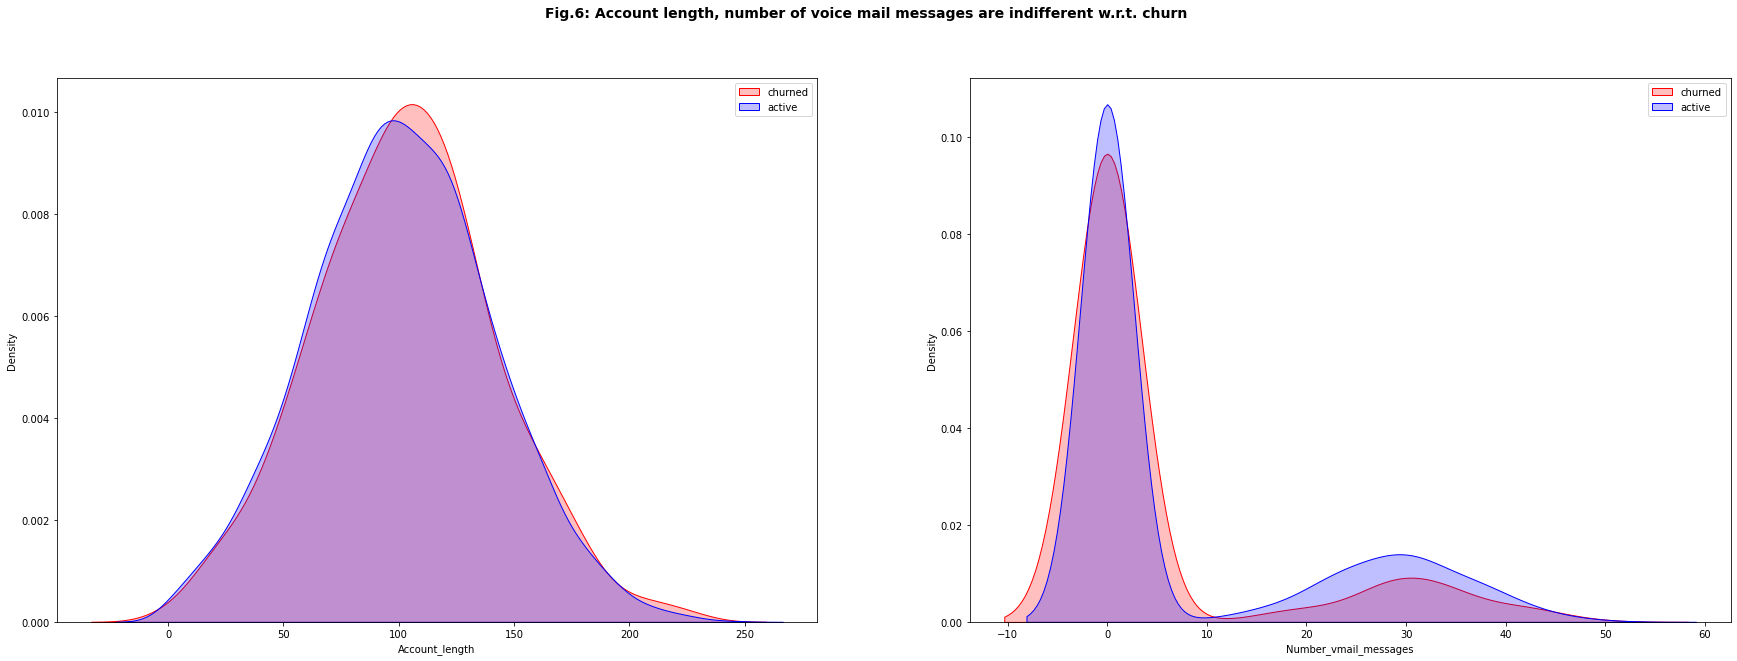

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (30, 10))
sns.kdeplot(data=Telecom_churn_df[Telecom_churn_df['Churn']]['Account_length'],shade=True, color="r", label = 'churned', ax=ax1)
sns.kdeplot(Telecom_churn_df[~(Telecom_churn_df['Churn'] == 'False')]['Account_length'],shade=True, color="b", label = 'active', ax=ax1)
ax1.legend()

sns.kdeplot(data=Telecom_churn_df[Telecom_churn_df['Churn']]['Number_vmail_messages'],shade=True, color="r", label = 'churned', ax=ax2)
sns.kdeplot(Telecom_churn_df[~(Telecom_churn_df['Churn'] == 'False')]['Number_vmail_messages'],shade=True, color="b", label = 'active', ax=ax2)
ax2.legend()

fig.suptitle('Fig.6: Account length, number of voice mail messages are indifferent w.r.t. churn',fontsize = 14, fontweight ="bold")

**INFERENCE:**

Account length, number of voice mail messages are indifferent w.r.t. churn throughout.

7. CUSTOMER RETENTION: HOW IMPORTANT IS IT? WAYS IT CAN BE DONE?

In [29]:
loss = Total_charge_cal_df[Total_charge_cal_df['Churn'] == True]['Total_charge'].sum()
loss_percent = (Total_charge_cal_df[Total_charge_cal_df['Churn'] == True]['Total_charge'].sum())\
/(Total_charge_cal_df['Total_charge'].sum()) * 100
Overall_churn = Overall_churn_rate * 100
print(f"For a churn rate of {round(Overall_churn, 2)}% the loss percent is {round(loss_percent, 2)}%\
 and loss is {loss}")
print(" \n\n**The loss calculated is calculated solely from the data provided; many other losses such as implementation cost,\
\ncustomer acquisition cost, maintenance cost, etc. are not considered.")

For a churn rate of 14.49% the loss percent is 15.93% and loss is 31566.93
 

**The loss calculated is calculated solely from the data provided; many other losses such as implementation cost,
customer acquisition cost, maintenance cost, etc. are not considered.


**WAYS FOR CUSTOMER RETENTION:**

It is important to note that the loss percent is much higher than just 15.93%, and therefore customer retention is vital.

1. Surveys have shown that the most cost efficient way to generate company's revenue is by increasing the customer's retention period.
2. A few ways to increase customer retention period- better price offers, lucrative incentives, better service experiences,etc.
3. The earlier analysis could also help the company to retain its customers by reducing the cost of international calls, improving service in a few areas, prioritizing customers who called customer service more than four times, eliminating call drops, etc.




---


---



**CONCLUSION:**

1. One is charged based on the amount of time one spends on the call.
2. The attributes which are not contributing to the churn are -
 1. Area code
 2. Account length
 3. Voice Mail Plan
 4. Number of voice messages.
3. Either the international call services are poor, or the prices are higher than those of other operators.
4. It would make sense to offer lucrative incentives to customers who make more than four service calls, such as free limited data or OTT services. 
5. Of the 51 states, 23 states have churn rates higher than the average. This requires more attention to understanding local customer needs.
6. The churn rate was highest when the total charge (day charges + night charges + evening charges + international charges) exceeded 73 dollars.
7. In the daytime, more calls are made than at night or in the evening, which means more traffic, which results in call drops, which ultimately leads to poor service and churn. 



---



---

